In [ ]:
!pip install datasets huggingface_hub
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.4 MB/s eta 0:00

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import torch
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

Found GPU at: /device:GPU:0


'Tesla T4'

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("/content/drive/MyDrive/NLP_Papers/zeroshot_data/zeroshot_multiclass_train.csv")
train, val = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)

train.to_csv('/content/drive/MyDrive/NLP_Papers/zeroshot_data/train_multiclass.csv', index=False)
val.to_csv('/content/drive/MyDrive/NLP_Papers/zeroshot_data/val_multiclass.csv', index=False)
train_path='/content/drive/MyDrive/NLP_Papers/zeroshot_data/train_multiclass.csv'
val_path='/content/drive/MyDrive/NLP_Papers/zeroshot_data/val_multiclass.csv'

from datasets import load_dataset
train_dataset=load_dataset("csv", data_files=train_path)
val_dataset=load_dataset("csv", data_files=val_path)
test_dataset=load_dataset("csv", data_files="/content/drive/MyDrive/NLP_Papers/zeroshot_data/zeroshot_multiclass_test.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b0d1fcc549f43fa3/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-464eda7b20724e38/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-e86f51b1ee4d5347/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
val_dataset

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label'],
        num_rows: 1096
    })
})

In [ ]:
test_dataset

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label'],
        num_rows: 2003
    })
})

In [ ]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label'],
        num_rows: 4384
    })
})

In [ ]:
def preprocess_function(examples):
   return tokenizer(examples["RomanUrduText"], truncation=True)

In [ ]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)
tokenized_val = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/4384 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

In [ ]:
tokenized_train

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label', 'input_ids', 'attention_mask'],
        num_rows: 4384
    })
})

In [ ]:
train_dataset = tokenized_train.map(lambda x: {"text": x["RomanUrduText"], "labels": x["Label"]})
test_dataset = tokenized_test.map(lambda x: {"text": x["RomanUrduText"], "labels": x["Label"]})
val_dataset = tokenized_val.map(lambda x: {"text": x["RomanUrduText"], "labels": x["Label"]})

Map:   0%|          | 0/4384 [00:00<?, ? examples/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Map:   0%|          | 0/1096 [00:00<?, ? examples/s]

In [ ]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label', 'input_ids', 'attention_mask', 'text', 'labels'],
        num_rows: 4384
    })
})

AttributeError: ignored

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import AutoModelForSequenceClassification
num_label = 5
model = AutoModelForSequenceClassification.from_pretrained("facebook/opt-125m", num_labels=num_label).to(device)

Some weights of the model checkpoint at facebook/opt-125m were not used when initializing OPTForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing OPTForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing OPTForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-125m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
#compute 4
import evaluate
import numpy as np
from evaluate import load


f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics (eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis = -1)


    results = {}
    results.update(f1_metric.compute(predictions=preds, references = labels, average="micro"))
    results.update(accuracy_metric.compute(predictions=preds, references=labels))
    results.update(recall_metric.compute(predictions=preds, references = labels, average="micro"))
    results.update(precision_metric.compute(predictions=preds, references=labels, average="micro"))
    return results

In [ ]:
from transformers import TrainingArguments, Trainer
 
 
training_args = TrainingArguments(
   output_dir="/content/drive/MyDrive/NLP_Papers/zeroshot_data",
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=4,
   weight_decay=0.01,
   save_strategy="epoch",
)
 
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=train_dataset['train'],
   eval_dataset=val_dataset['train'],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [ ]:
#epoch
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.435300
1000,0.133000


TrainOutput(global_step=1096, training_loss=0.2651582838845079, metrics={'train_runtime': 293.7317, 'train_samples_per_second': 59.701, 'train_steps_per_second': 3.731, 'total_flos': 764558670643200.0, 'train_loss': 0.2651582838845079, 'epoch': 4.0})

In [ ]:
print(trainer.tokenizer())

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2532 in __call__ │
│                                                                                                  │
│   2529 │   │   }                                                                                 │
│   2530 │   │   all_kwargs.update(kwargs)                                                         │
│   2531 │   │   if text is None and text_target is None:                                          │
│ ❱ 2532 │   │   │   raise ValueError("You need to specify either `text` or `text_target`.")       │
│   2533 │   │   if text is not None:                                                              │
│   2534 │   │   │   # The context manager will send the inputs as normal texts and not text_targ  │
│   2535 │   │   │   # input mode in this case.                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: You need to specify either `text` or `text_target`.

In [ ]:
trainer.evaluate()

{'eval_loss': 0.5122889876365662,
 'eval_f1': 0.8978102189781021,
 'eval_accuracy': 0.8978102189781022,
 'eval_recall': 0.8978102189781022,
 'eval_precision': 0.8978102189781022,
 'eval_runtime': 5.2883,
 'eval_samples_per_second': 207.249,
 'eval_steps_per_second': 13.048,
 'epoch': 4.0}

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
torch.cuda.current_device()

0

In [ ]:
test_dataset

DatasetDict({
    train: Dataset({
        features: ['RomanUrduText', 'Label', 'input_ids', 'attention_mask', 'text', 'labels'],
        num_rows: 2003
    })
})

In [ ]:
type(test_dataset['train']['labels'][0])

int

In [ ]:
from transformers import pipeline

# Load the fine-tuned model

classifier = pipeline("zero-shot-classification", model=model, tokenizer = tokenizer, device=0)

# Example usage
labels = [0, 1, 2, 3, 4]
results = dict()
df_test=pd.DataFrame()

for text in test_dataset['train']['text']:
  res = classifier(text, labels)
  # print(res['labels'])
  max_value = max(res['scores'])
  max_index = res['scores'].index(max_value)
  
  results[text]= res['labels'][max_index]
  

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1080: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [ ]:
print(results)

{'bhenchod itna mushkil to nai hona tha zindagi ko': 2, 'g g blkl aap ko kya pata 😂😂😂': 1, 'khinzeer mullahs .. who cares..': 1, 'bhenchod madarchod 🤡': 1, 'allah karim ham pe rehm farmaye.': 1, "oh really 😏...i don't believe that...19  ki age mai uni...or tmhy ye nhi pta kisi larky ko app nhi kehty😒🤔": 1, 'can anyone confirm it, who is current dgispr ha babar iftakhar or maj gen asif ghafoor? if asif ghafoor is not working as dg, why he gave such statement whereas maj gen babar is responsible for this work being #dgispr': 1, 'kasy btaaa du itna mushkil hai aesy uska direct nam ly kar btana 🥺🥺🥺': 1, 'achha ji...ek baat bataiye...sirf apki chut hi chodi thi ya gaand bhi?': 1, 'pehle apne aap ko to bacha le chutye yahudi agent': 1, 'bhenchod sab fake ho lun khao mein ne pirate ship pe jana tha': 1, 'ashaw tumhra dimgah set karti hon main wait muje pata hai tera ke keya hua hai 😂🤧': 1, 'choutha tera baap tha?? sbki tsveer daal saale ktwe dikha di apni aukad. all are culprits': 1, 'tum jai

In [ ]:
test_dataset['train']

Dataset({
    features: ['RomanUrduText', 'Label', 'input_ids', 'attention_mask', 'text', 'labels'],
    num_rows: 2003
})

In [ ]:
actual_label=[]
predicted_label=[]
for i in range(len(test_dataset['train']['text'])):
  actual_label.append(test_dataset['train']['labels'][i])
  predicted_label.append(results[test_dataset['train']['text'][i]])
  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score

print('Test F1 Accuracy: ', f1_score(actual_label, predicted_label,average='micro'))
print('Test Flat Accuracy: ', accuracy_score(actual_label, predicted_label),'\n')
clf_report = classification_report(actual_label, predicted_label, labels=list([0, 1, 2, 3, 4]), target_names=list(['0', '1', '2','3', '4']))
# pickle.dump(clf_report, open('classification_report.txt','wb')) #save report
print(clf_report)


Test F1 Accuracy:  0.33349975037443835
Test Flat Accuracy:  0.33349975037443835 

              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1070
           1       0.43      0.51      0.47       481
           2       0.14      0.08      0.10       156
           3       0.01      0.03      0.01       168
           4       0.10      0.02      0.04       128

    accuracy                           0.33      2003
   macro avg       0.25      0.20      0.21      2003
weighted avg       0.42      0.33      0.36      2003



In [ ]:
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Normalized confusion matrix


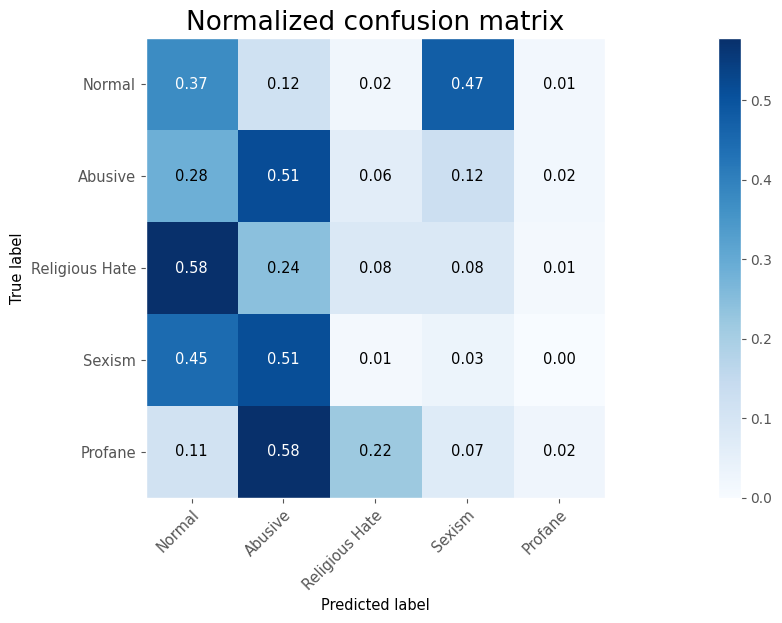

In [ ]:
from ml_things import plot_dict, plot_confusion_matrix, fix_text
# Plot confusion matrix.
plot_confusion_matrix(y_true=actual_label, y_pred=predicted_label, 
                      classes=list(["Normal", "Abusive","Religious Hate","Sexism","Profane"]), normalize=True, 
                      magnify=0.1,
                      );
#                       2: Religious Hate

# 3: Sexism

# 4: Profane/Untargeted